In [5]:
import numpy as np 
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding



reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [20]:
#it will basically give random numbers to the words present in reviews 

one_hot("amazing restaurant",50)

[36, 35]

In [22]:
vocab_size = 50
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
print(encoded_reviews)

[[36, 2], [36, 35], [32, 14], [40, 35, 32], [6, 47, 40], [19, 2], [38, 47, 38], [35, 23], [35, 21], [11, 44]]


In [24]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

[[36  2  0  0]
 [36 35  0  0]
 [32 14  0  0]
 [40 35 32  0]
 [ 6 47 40  0]
 [19  2  0  0]
 [38 47 38  0]
 [35 23  0  0]
 [35 21  0  0]
 [11 44  0  0]]


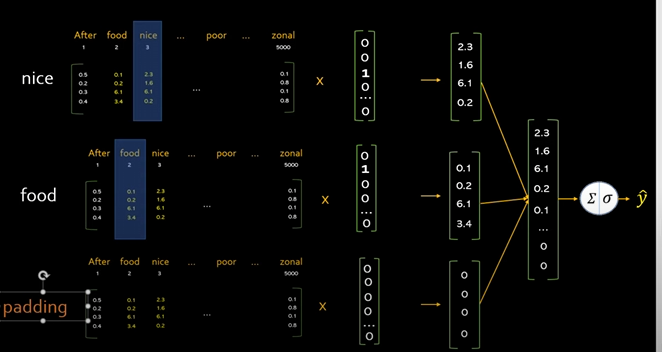

In [31]:
embeded_vector_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length,name="embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [33]:
X = padded_reviews
y = sentiment

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [37]:
model.fit(X, y, epochs=50, verbose=0)

In [39]:
# evaluate the model
loss, accuracy = model.evaluate(X, y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9000 - loss: 0.6317


0.8999999761581421

In [41]:

weights = model.get_layer('embedding').get_weights()[0]
len(weights)

50

In [43]:
weights[13]

array([-0.03624816,  0.00750071,  0.00987862, -0.02616122, -0.0485609 ],
      dtype=float32)